## 1.Visualització, histograma i contrast

In [1]:
import cv2
# Llegim la imatge en aquest cas la estem llegint en BGR
img = cv2.imread("BerkeleyTower.png") 
tamany = img.shape  #Tamany de la imatge
print(tamany)

#Mostrem la imatge amb els tres canals junts
cv2.imshow("Berkeley",img)
cv2.waitKey(0)       # El programa s'espera indefinidament fins que premem una tecla      
cv2.destroyAllWindows() # Tanquem totes les finestres

(499, 748, 3)


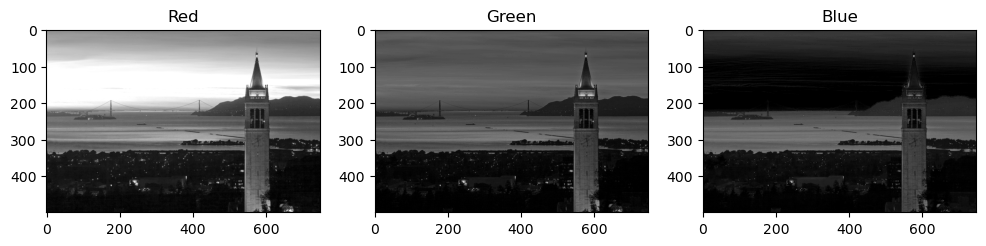

In [3]:
import matplotlib.pyplot as plt

#Creem una finestra nova per tal de poder controlar la mida 
plt.figure(figsize = (12,4))

#Separem la imatge en els tres canals
b,g,r = cv2.split(img)
#Visualtizem els tres canals per sepassrat
#posem cmap = "gray" perque imshow per defecte interpreta l'entrada com una imatge de 3 canals
#pero nomes és un en aquest cas per tant ho pasem en escala de grisos, és a dir, 1 canal
plt.subplot(1,3,1)
plt.imshow(r,cmap = "gray")
plt.title("Red")
plt.subplot(1,3,2)
plt.imshow(g,cmap = "gray")
plt.title("Green")
plt.subplot(1,3,3)
plt.imshow(b,cmap = "gray")
plt.title("Blue")
plt.show()

In [4]:
#A partir d'ara treballarem sempre amb imatges d'un unic canal

img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imshow("Berkeley",img_gray)
cv2.waitKey(0)         
cv2.destroyAllWindows()

tamany_gray = img_gray.shape
print(tamany_gray)

(499, 748)


Ara que hem convertit la imatge en escala de grisos, quan trobem la mida de la imatge, a diferencia del cas anterior que ens retorna tres arguments: files, columnes i canals, ara ens retorna una tupla amb nomès dos arguments que son el nombre de files i columnes ja que el canal és únic al estar en escala de grisos.


### PREGUNTA 1.1 Indiqueu quina és la resolució espacial i de profunditat de la imatge img_gray

Per saber la resolució espacial i la profunditat de la imatge necessitarem saber, el nombre de pixels d'altura i d'amplada i quants valors pot prendre cada pixel. Utilitzarem _.shape i _.dtype, els primer ens retorne el nombre de files de pixels i el nombre de columnes i el segon el tipus de píxel, és a dir, el rang de valors que pot prendre

In [10]:
tamany_gray = img_gray.shape
pixel_type = img_gray.dtype
print(f"Resolució espacial  = ({tamany_gray[1]},{tamany_gray[0]})")
print(f"Tipus de píxel = {pixel_type} -> Resolució de profunditat = (0,255)")

Resolució espacial  = (748,499)
Tipus de píxel = uint8 -> Resolució de profunditat = (0,255)


### Histograma


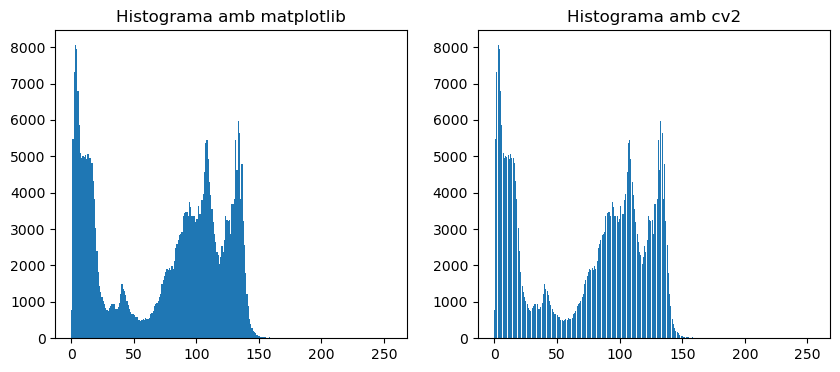

In [13]:
import numpy as np
hist = cv2.calcHist([img_gray],[0],None,[256],[0,256])
#(imagte,canal,mascara --> none = histograma de tota la imatge,tamañ del l'histograma, rang)


plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.title("Histograma amb matplotlib")
plt.hist(img_gray.flatten(),256,[0,256],density=False)
plt.subplot(1,2,2)
plt.title("Histograma amb cv2")
plt.bar(np.arange(0,256,1),hist.flatten())
plt.show()

### Canvis lineals

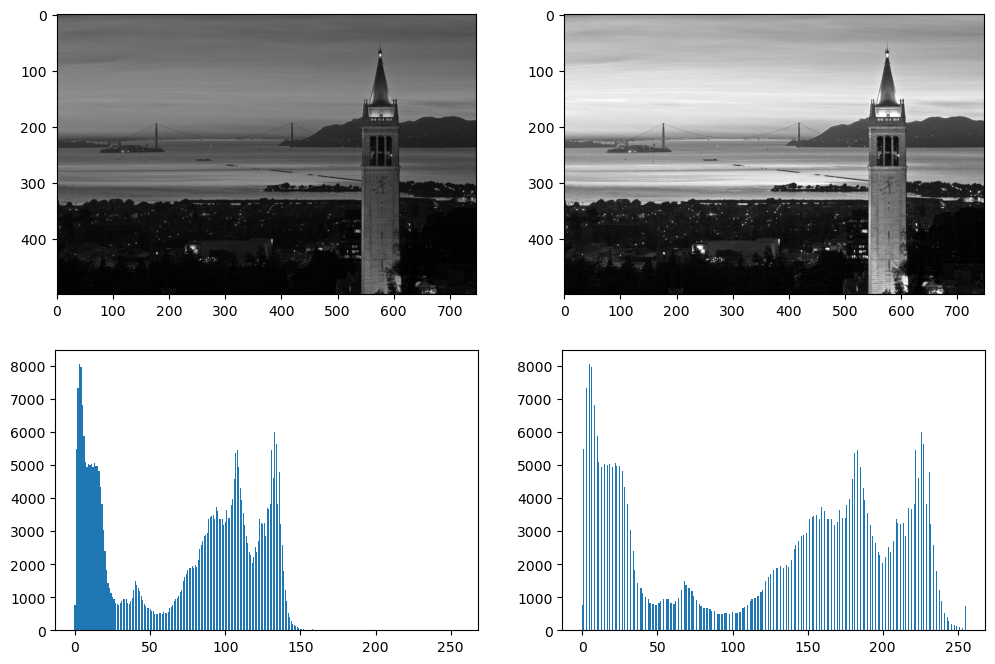

In [46]:
from skimage import exposure
# exposure.rescale_intensity és una eina per fer ajustos lineals amb imatges
#li donem una imatge amb un range d'entrada,
#on estan acomulats la majoria de pixels
#tambe li donem el rang on volem que reescali els valors 
linadj_img = exposure.rescale_intensity(img_gray, in_range=(0, 150), out_range=(0, 255))
#la iamtge que ens retorna pot tenir pixels tipus float64 i volem que sigui unit8
linadj_img = linadj_img.astype(np.uint8)

histadj = cv2.calcHist([linadj_img],[0],None,[256],[0,256])

plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
plt.imshow(img_gray,cmap = "gray")
plt.subplot(2,2,2)
plt.imshow(linadj_img,cmap = "gray")
plt.subplot(2,2,3)
plt.bar(np.arange(0,256,1),hist.flatten())
plt.subplot(2,2,4)
plt.bar(np.arange(0,256,1),histadj.flatten())
plt.show()

### Equalització histograma

770.0


TypeError: Invalid shape (256,) for image data

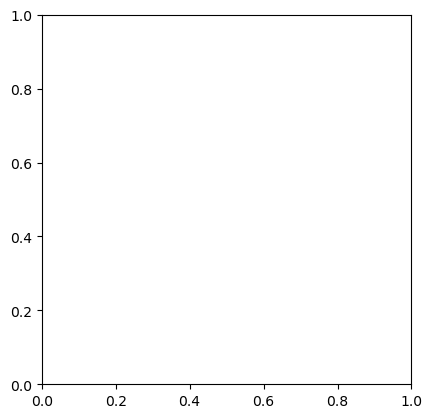

In [62]:
#de la wikipedia
cdf = np.cumsum(hist)
print(min(cdf))
imgeq = (cdf-min(cdf))*255/(max(cdf)-min(cdf))
plt.imshow(imgeq,cmap="gray")